In [16]:
# load packages

In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# load datasets for 1.5, 2, 3, and 4 degrees warming and make "county_and_state" column

In [30]:
file_path_1 = "NCA_Atlas_Figures_Beta_Counties_view_-7947877000937677562 (1).csv"
df_1 = pd.read_csv(file_path_1)
df_1.head()

,OBJECTID,County name,State name,State abbreviation,FIPS,Precip Above 99th pctl,Precip 1-day max,Precip 5-year max,Temperature average,Temp max 1-day,...,Temp Days 95 F,Temp mean summer,Temp Days Min 70 F,Temp Days Min 0 F,Temp Days Min 32 F,Temp min summer,Precip Annual GWL1,Precip Days 99 pctl GWL1,Shape__Area,Shape__Length
0,1,Autauga County,Alabama,AL,1001,8.866368,1.204632,0.560895,1.732316,1.543474,...,14.359526,1.604421,22.678737,-0.039947,-8.215921,1.774947,2.231684,11.870172,2.208626e+09,2.495680e+05
1,2,Baldwin County,Alabama,AL,1003,10.447559,3.454147,1.104216,1.633755,1.526716,...,14.127980,1.508863,19.807863,-0.008627,-5.261471,1.667588,3.200307,11.634376,5.743992e+09,1.089822e+06
2,3,Barbour County,Alabama,AL,1005,10.930474,0.800702,0.499965,1.649667,1.629789,...,13.983421,1.571404,23.813614,-0.017614,-6.758772,1.625246,2.796249,16.953608,3.257820e+09,3.193028e+05
3,4,Bibb County,Alabama,AL,1007,10.956795,2.631909,1.330318,1.789705,1.623523,...,13.283023,1.684205,22.352250,-0.083273,-9.176136,1.856455,1.619284,14.511721,2.312191e+09,2.279085e+05
4,5,Blount County,Alabama,AL,1009,18.316114,6.689886,6.570682,1.757045,1.530205,...,9.981773,1.639023,18.284318,-0.132205,-9.861114,1.868750,3.069511,23.057712,2.456981e+09,2.913548e+05


In [31]:
df_1['county_and_state'] = df_1['County name'] + ', ' + df_1['State abbreviation']
df_1

,OBJECTID,County name,State name,State abbreviation,FIPS,Precip Above 99th pctl,Precip 1-day max,Precip 5-year max,Temperature average,Temp max 1-day,...,Temp mean summer,Temp Days Min 70 F,Temp Days Min 0 F,Temp Days Min 32 F,Temp min summer,Precip Annual GWL1,Precip Days 99 pctl GWL1,Shape__Area,Shape__Length,county_and_state
0,1,Autauga County,Alabama,AL,1001,8.866368,1.204632,0.560895,1.732316,1.543474,...,1.604421,22.678737,-0.039947,-8.215921,1.774947,2.231684,11.870172,2.208626e+09,2.495680e+05,"Autauga County, AL"
1,2,Baldwin County,Alabama,AL,1003,10.447559,3.454147,1.104216,1.633755,1.526716,...,1.508863,19.807863,-0.008627,-5.261471,1.667588,3.200307,11.634376,5.743992e+09,1.089822e+06,"Baldwin County, AL"
2,3,Barbour County,Alabama,AL,1005,10.930474,0.800702,0.499965,1.649667,1.629789,...,1.571404,23.813614,-0.017614,-6.758772,1.625246,2.796249,16.953608,3.257820e+09,3.193028e+05,"Barbour County, AL"
3,4,Bibb County,Alabama,AL,1007,10.956795,2.631909,1.330318,1.789705,1.623523,...,1.684205,22.352250,-0.083273,-9.176136,1.856455,1.619284,14.511721,2.312191e+09,2.279085e+05,"Bibb County, AL"
4,5,Blount County,Alabama,AL,1009,18.316114,6.689886,6.570682,1.757045,1.530205,...,1.639023,18.284318,-0.132205,-9.861114,1.868750,3.069511,23.057712,2.456981e+09,2.913548e+05,"Blount County, AL"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3106,3107,Washakie County,Wyoming,WY,56043,17.864115,6.655069,8.193466,2.103356,2.002747,...,2.147466,0.158741,-5.406983,-11.806500,2.097448,5.085914,16.041836,1.119306e+10,5.302211e+05,"Washakie County, WY"
3107,3108,Weston County,Wyoming,WY,56045,20.280563,5.863631,8.519034,2.067239,2.078767,...,2.164869,0.597778,-4.788625,-10.939795,2.158937,4.700654,18.228163,1.195226e+10,4.377290e+05,"Weston County, WY"
3108,3109,NaN,Puerto Rico,PR,72,4.800000,0.700000,5.800000,0.950000,NaN,...,NaN,28.700000,NaN,NaN,NaN,NaN,NaN,9.971219e+09,1.220207e+06,NaN
3109,3110,NaN,Alaska,AK,2,22.300000,6.500000,5.900000,2.100000,NaN,...,NaN,NaN,-7.449000,-12.600000,NaN,NaN,NaN,8.202575e+12,8.103753e+07,NaN


In [69]:
file_path_2 = "NCA_Atlas_GWL_2C_-2110005955286935887.csv"
df_2 = pd.read_csv(file_path_2)
#df_2.head()

In [70]:
df_2['county_and_state'] = df_2['County name'] + ', ' + df_2['State abbreviation']
#df_2

In [71]:
file_path_3 = "NCA_Atlas_Global_Warming_Level_5_deg_F_7660615008925248363.csv"
df_3 = pd.read_csv(file_path_3)
#df_3.head()

In [72]:
df_3['county_and_state'] = df_3['County name'] + ', ' + df_3['State abbreviation']
#df_3

In [73]:
file_path_4 = "NCA_Atlas_Global_Warming_Level_7_deg_F_378192723792765213.csv"
df_4 = pd.read_csv(file_path_4)
#df_4.head()

In [74]:
df_4['county_and_state'] = df_4['County name'] + ', ' + df_4['State abbreviation']
#df_4

In [ ]:
# means for change in average annual temperature for each scenario

In [18]:
df_1_mean_temp = df_1['Temperature average'].mean()
df_1_mean_temp

np.float64(2.0776725932447286)

In [19]:
df_2_mean_temp = df_2['Temperature average'].mean()
df_2_mean_temp

np.float64(3.3485545517074806)

In [20]:
df_3_mean_temp = df_3['Temperature average'].mean()
df_3_mean_temp

np.float64(5.790901846107021)

In [21]:
df_4_mean_temp = df_4['Temperature average'].mean()
df_4_mean_temp

np.float64(7.488466818456745)

In [ ]:
# changes in average annual temperature by county for each scenario

Text(0.5, 1.0, 'Scenario 1.5: Increase in average annual temperature by county')

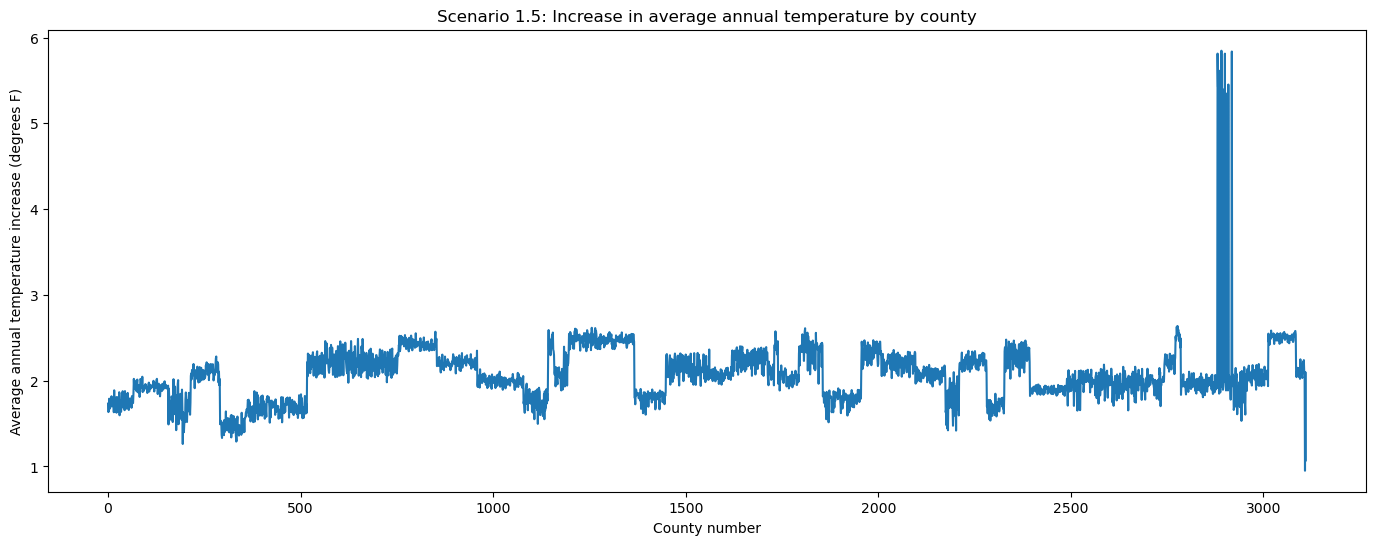

In [89]:
plt.figure(figsize=(17, 6))
plt.plot(df_1['Temperature average'])
plt.xlabel('County number')
plt.ylabel('Average annual temperature increase (degrees F)')
plt.title('Scenario 1.5: Increase in average annual temperature by county')

In [ ]:
# 30 counties that will have largest change in annual temperature for each scenario

<Axes: title={'center': 'Scenario 1.5: Top 30 counties with highest increase in average annual temperature'}, xlabel='County', ylabel='Average annual temperature increase (degrees F)'>

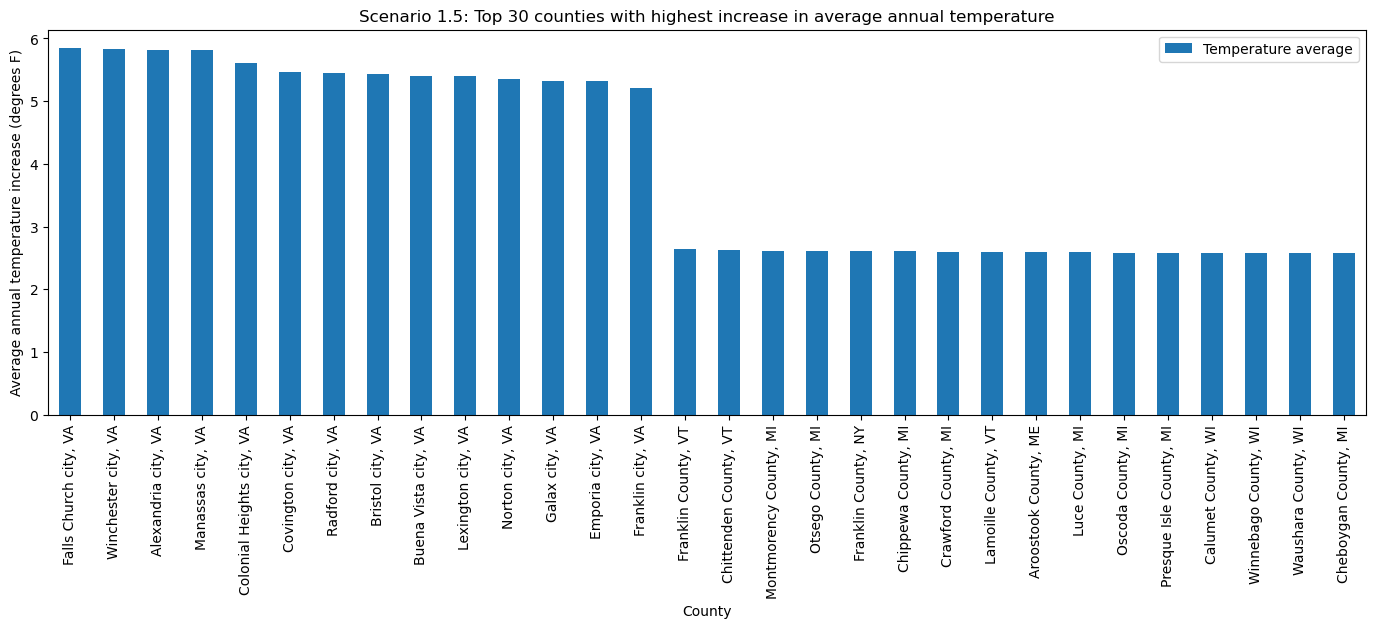

In [98]:
df_1_30_largest_temp = df_1.nlargest(30,'Temperature average')
df_1_30_largest_temp_nameandtemp = df_1_30_largest_temp[["Temperature average", "county_and_state"]]
df_1_30_largest_temp_nameandtemp.set_index(['county_and_state']).plot(kind='bar', xlabel='County', ylabel='Average annual temperature increase (degrees F)', title="Scenario 1.5: Top 30 counties with highest increase in average annual temperature", figsize=(17, 5))

In [ ]:
# means for change in annual precipitation for each scenario

In [22]:
df_1_mean_precip = df_1['Precip Annual GWL1'].mean()
df_1_mean_precip

np.float64(2.567082813525189)

In [23]:
df_2_mean_precip = df_2['Precip Annual GWL2'].mean()
df_2_mean_precip

np.float64(2.5116559991090837)

In [24]:
df_3_mean_precip = df_3['Precip Annual GWL3'].mean()
df_3_mean_precip

np.float64(4.776370951539888)

In [25]:
df_4_mean_precip = df_4['Precip Annual GWL4'].mean()
df_4_mean_precip

np.float64(6.397775656255075)

In [ ]:
# changes in average annual temperature by county for each scenario

Text(0.5, 1.0, 'Scenario 1.5: Increase in average annual precipitation by county')

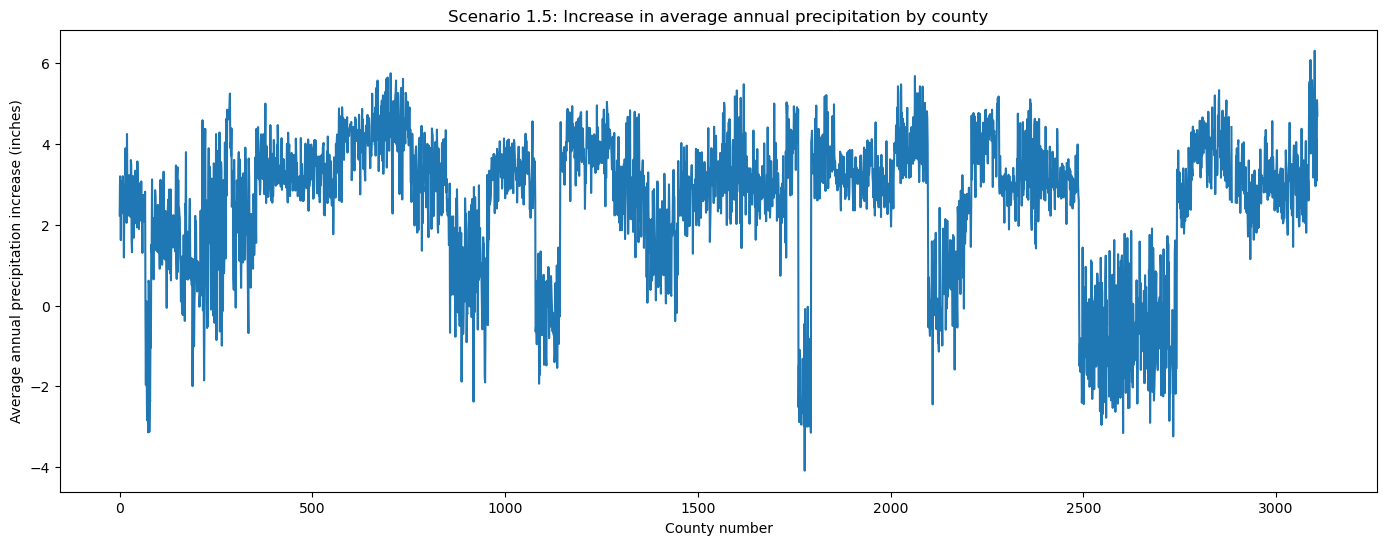

In [90]:
plt.figure(figsize=(17, 6))
plt.plot(df_1['Precip Annual GWL1'])
plt.xlabel('County number')
plt.ylabel('Average annual precipitation increase (inches)')
plt.title('Scenario 1.5: Increase in average annual precipitation by county')

<Axes: title={'center': 'Scenario 1.5: Top 30 counties with highest increase in average annual precipitation'}, xlabel='County', ylabel='Average annual precipitation increase (inches)'>

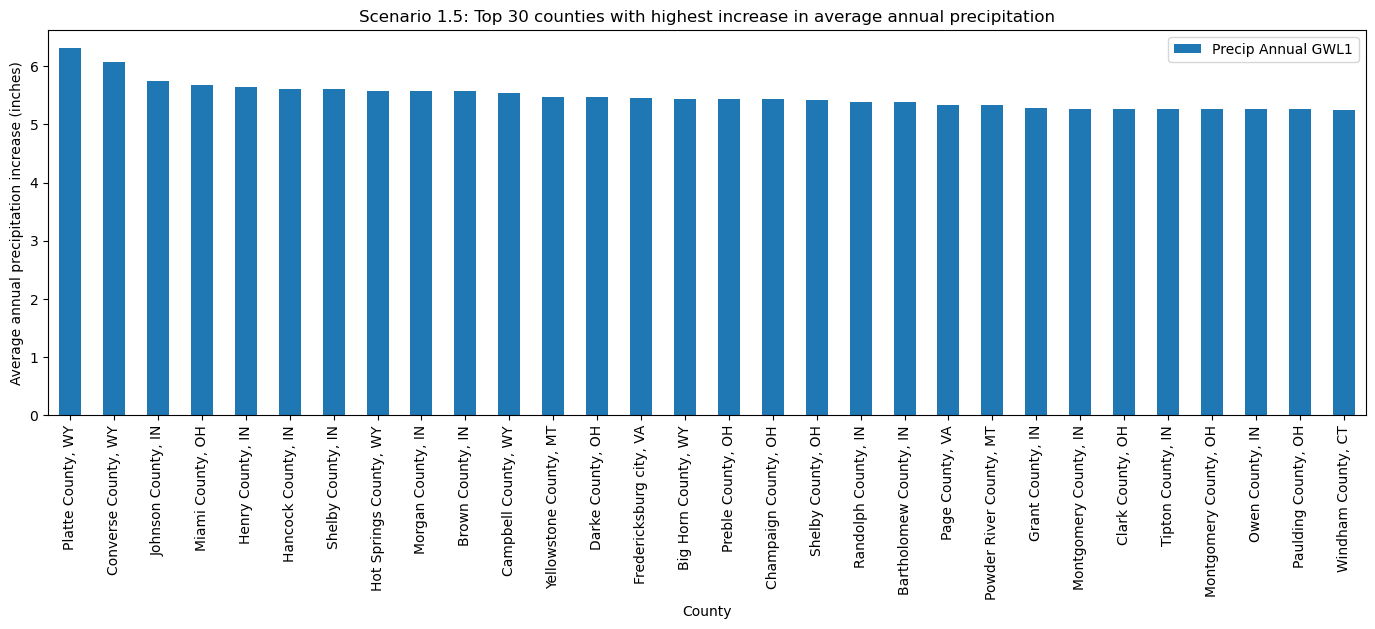

In [100]:
df_1_30_largest_precip = df_1.nlargest(30,'Precip Annual GWL1')
df_1_30_largest_precip_nameandprecip = df_1_10_largest_precip[["Precip Annual GWL1", "county_and_state"]]
df_1_30_largest_precip_nameandprecip.set_index(['county_and_state']).plot(kind='bar', xlabel='County', ylabel='Average annual precipitation increase (inches)', title="Scenario 1.5: Top 30 counties with highest increase in average annual precipitation", figsize=(17, 5))